In [147]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import itertools
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
import operator
import seaborn as sns

In [148]:
data = pd.read_csv('adult_data.csv', names=['age', 'workclass','fnlwgt', 
                                                         'education', 'education_num', 'martial_status',
                                                         'occupation','relationship','race','sex',
                                                        'capital_gain','capital_loss','hours_per_week',
                                                        'native_country','income_class'])

In [149]:
data.head()

,age,workclass,fnlwgt,education,education_num,martial_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [150]:
print(data.isna().values.any())
print(data.isnull().values.any())
print(data.shape)

False
False
(32561, 15)


In [151]:
features = ['age', 'workclass','fnlwgt', 'education', 'education_num', 'martial_status',
                'occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week',
                                                        'native_country']
categorical_features = ['workclass', 'education', 'martial_status',
                'occupation','relationship','race','sex','native_country']
numerical_features = ['age', 'fnlwgt', 'education_num', 'capital_gain','capital_loss','hours_per_week']
data_x = data.loc[:, features]
data_y = data.loc[:, ['income_class']]

### VIsualization of Data

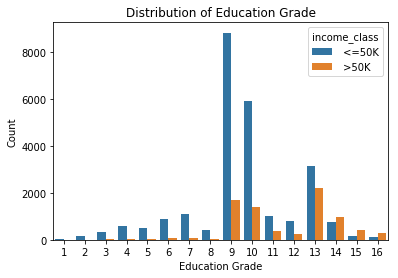

In [152]:
sns.countplot(x="education_num", hue="income_class", data=data)
plt.title("Distribution of Education Grade")
plt.xlabel("Education Grade")
plt.ylabel("Count")
plt.show()

In this visualization, we are looking to see the distribution of education level. We use the vertical channel to display the number of adults of each education grade. Here we are use that education grade 9 and 10 are the two most common education grades. Using color, we can distinguish between the different income class prediction class. It seems that while it is possible to make more than 50K with an education grade under 9, it is way more likely for you to be able to more than 50k, with a higher education grade. In fact, once you have an education grade 14 or higher, you are more likely to make more than 50k.

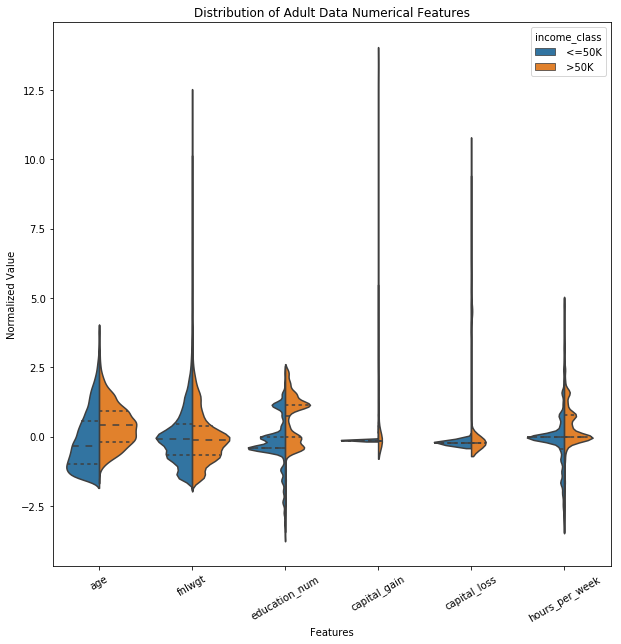

In [153]:
numericaldata = data.loc[:, numerical_features]
numericaldata_std = (numericaldata - numericaldata.mean()) / (numericaldata.std())
numericaldata_std = pd.concat([data.income_class,numericaldata_std],axis=1)
violenData = pd.melt(numericaldata_std,
                    id_vars="income_class",
                    var_name="Features",
                    value_name='Value')
plt.figure(figsize=(10,10));
sns.violinplot(x="Features", y="Value", hue="income_class", data=violenData,split=True, inner="quart");
plt.title("Distribution of Adult Data Numerical Features")
plt.ylabel("Normalized Value")
plt.xticks(rotation=30);
plt.show()

In this visualization, we look at the distribution on the numerial features in a violin plot. The violin plot shows the distribution using area marks and spatial shapes. Dotted lines are added to denote each quartile percentage. We also use color to show if there is any difference in distribution based on income class. We can see based on the shapes of plot, there are some huge outliers in certain features, such as fnlwgt, capital gain, and captial loss.

In [154]:
lb_dict = {}
for col in categorical_features:
    lb = LabelEncoder()
    data_x[[col]] = lb.fit_transform(data[[col]])
    lb_dict[col] = lb
    
lb_income_class = LabelEncoder()
data_y = lb_income_class.fit_transform(data_y)
lb_dict['income_class'] = lb_income_class
data_y = pd.DataFrame(data=data_y)

C:\Users\vghli\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [155]:
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.20, random_state=1234)
for col in numerical_features:
    x_train[[col]] = (x_train[[col]] - x_train[[col]].mean()) / (x_train[[col]].std())
    x_test[[col]] = (x_test[[col]] - x_test[[col]].mean()) / (x_test[[col]].std())

C:\Users\vghli\Anaconda3\lib\site-packages\pandas\core\frame.py:2540: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [156]:
knn = KNeighborsClassifier()
k_range = list(range(1, 11))
p_range = list(range(1, 3))
param_grid = { 'n_neighbors': k_range, 'p': p_range }
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', n_jobs = 4)
grid.fit(x_train, np.ravel(y_train))

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=4,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'p': [1, 2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [157]:
scores = grid.grid_scores_
results = grid.cv_results_ 

knn_result_list= []
for s in range(0, 10):
    key_split = 'split'+ str(s) + '_test_score' 
    for i in range(1, 21, 2):
        knn_result_list.append({'n_neighbors': results.get('params')[i].get('n_neighbors'),
                               'split_num': s+1,
                              'score': results.get(key_split)[i]})
knn_neighbor = list(range(0,10))
knn_scores = []
for i in range(0, 20, 2):
    knn_scores.append(scores[i][1])
knn_result_df = pd.DataFrame(knn_result_list)
knn_result_df_groups = knn_score_df.groupby('n_neighbors')

C:\Users\vghli\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


### Visualize Effect of Number of Neighbors

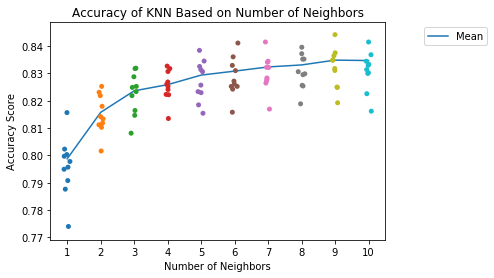

In [158]:
# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
#for name, group in knn_result_df_groups:
    
    #sns.stripplot(group.n_neighbors, group.score, jitter=0.2, size=2,label=name)

    #ax.plot(group.n_neighbors, group.score, marker='o', linestyle='', ms=10, label=name)
sns.stripplot(knn_result_df.n_neighbors, knn_result_df.score, jitter=0.1, size=5)
ax.plot(knn_neighbor, knn_scores, label='Mean', linestyle='-')
plt.legend(bbox_to_anchor=(1.1, 1.0), bbox_transform=ax.transAxes)
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy Score')
plt.title('Accuracy of KNN Based on Number of Neighbors')
plt.show()

In this visualization, we use a scatterplot to see accuracy scores of the K-Nearest Neighbor based on the number of neighbors used as the hyper parameter. We hold the p hyperparameter as l2 to be constant here. To note the distribution for the 10 fold for each class, we plot the results of each fold and use a little jitter to avoid overlapping each point. We then use a line plot to observe the trend in increasing the number of neighbors Lines are really meant for trend as noted in the lecture 4 data type slides. We can see that increasing the number of neighbors increasing the accuracy for each neighbor that is added but there are diminishing returns. It is interesting to note there is less variance when we use 4 neighbors, and the variance, as seen by the spread of the points, increases when we increases the number of neighbors as well. 